In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [3]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')
    
    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)   
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)  
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point 
        w=A[i,:]

        # projection
        cv = (np.dot(A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

In [4]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, factor=0.01, noise=0.05,random_state=0)
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y,random_state=0)

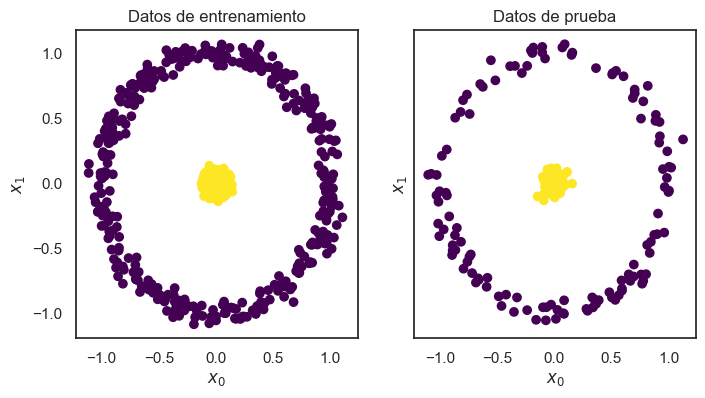

In [5]:
_, (train_ax, test_ax)= plt.subplots(ncols=2, sharex=True , sharey=True , figsize=(8,4))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='viridis')
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Datos de entrenamiento")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Datos de prueba")
plt.show()

In [6]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=2)

score_pca = pca.fit(X_train).transform(X_test)

In [7]:
pca

PCA(n_components=2)

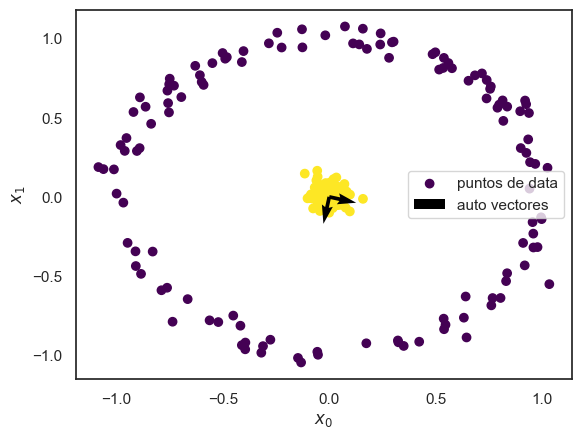

In [8]:
plt.scatter(score_pca[:,0], score_pca[:,1], c=y_test, label='puntos de data' , cmap='viridis')
plt.quiver([0,0],[0,0], pca.components_[0,:],pca.components_[1,:], label="auto vectores")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.legend(loc='center right')
plt.show()

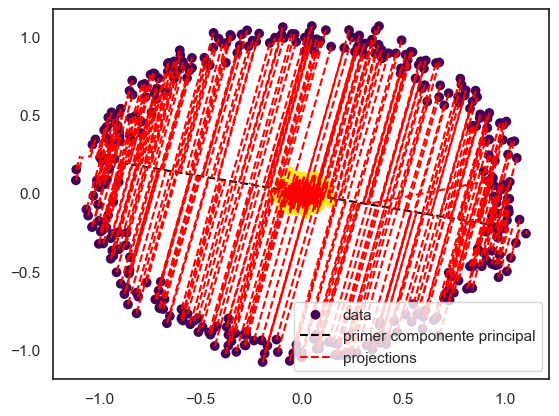

In [9]:
plot_proj(X_train,pca.components_[0,:],y_train,"primer componente principal")

Text(0.5, 1.0, 'proyección de los datos de prueba usando PCA')

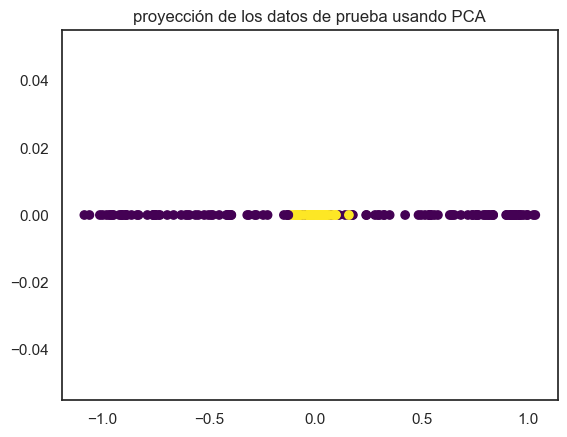

In [10]:
plt.scatter(score_pca [:,0], np.zeros(score_pca[:,0].shape[0]),c=y_test,cmap='viridis')
plt.title("proyección de los datos de prueba usando PCA")

In [11]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.496


In [13]:
PHI_train=np.concatenate((X_train,(X_train**2).sum(axis=1).reshape(-1,1)),axis=1)
PHI_test=np.concatenate((X_test, (X_test**2).sum(axis=1).reshape(-1,1)),axis=1)

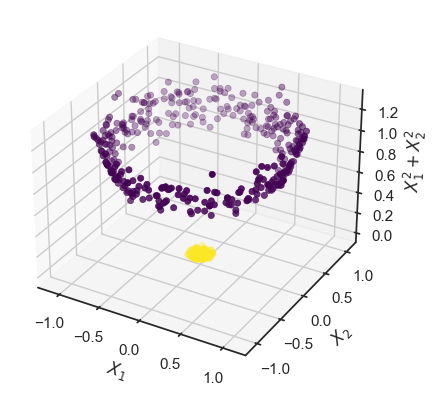

In [19]:
fig= plt.figure()
ax= fig.add_subplot(projection='3d')
ax.scatter(PHI_train[:,0], PHI_train[:,1], PHI_train[:,2],c=y_train,cmap='viridis', linewidth=0.5);
ax.set_xlabel('$X_{1}$')
ax.set_ylabel('$X_{2}$')
ax.set_zlabel('$X_{1}^2+X_{2}^2$')
plt.show()

In [20]:
pca=PCA(n_components=3)
score_polly= pca.fit(PHI_train).transform(PHI_test)

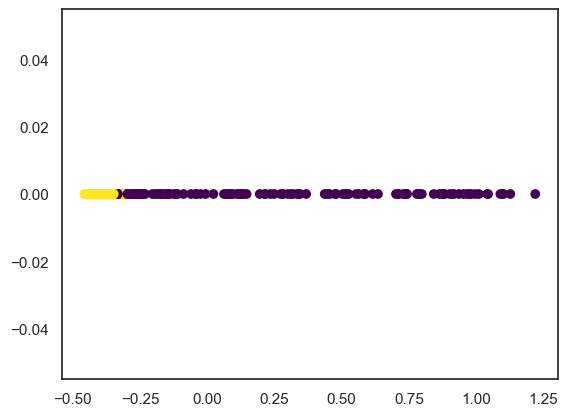

In [22]:
plt.scatter(score_polly[:,0], np.zeros(score_polly[:,1].shape[0]),c=y_test,cmap='viridis')

Text(0.5, 1.0, 'P')

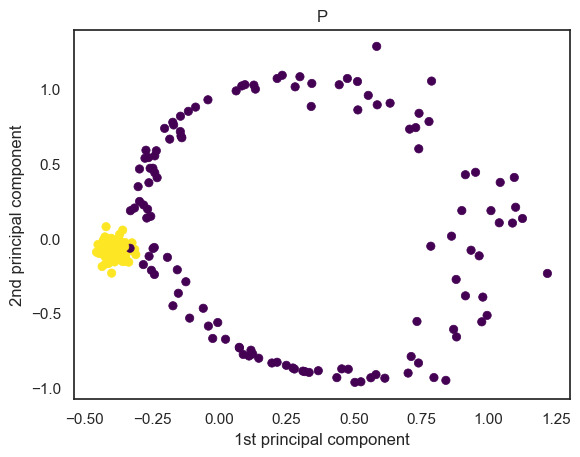

In [24]:
plt.scatter(score_polly[:,0], score_polly[:,1],c=y_test, cmap='viridis',linewidth=0.5);
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("P") 

In [25]:
lr=LogisticRegression().fit(PHI_train, y_train)
print(lr.score(PHI_test,y_test))

1.0


In [26]:
kernel_pca= KernelPCA( kernel ="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(X_train)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10, kernel='rbf')

In [27]:
score_Kernel_pca= kernel_pca.transform(X_test)

Text(0.5, 0, 'enecimo componente')

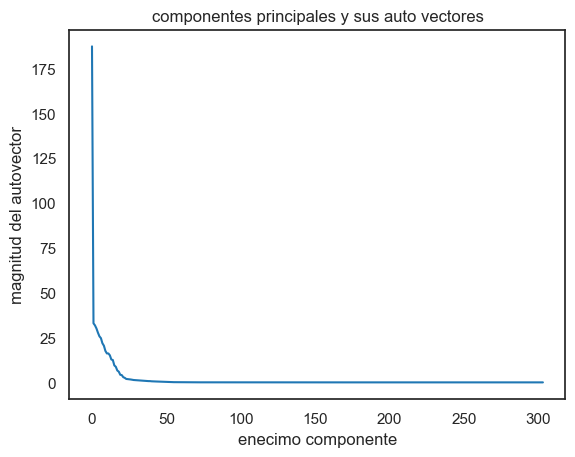

In [29]:
plt.plot(kernel_pca.eigenvalues_)
plt.title("componentes principales y sus auto vectores")
plt.ylabel("magnitud del autovector")
plt.xlabel("enecimo componente")

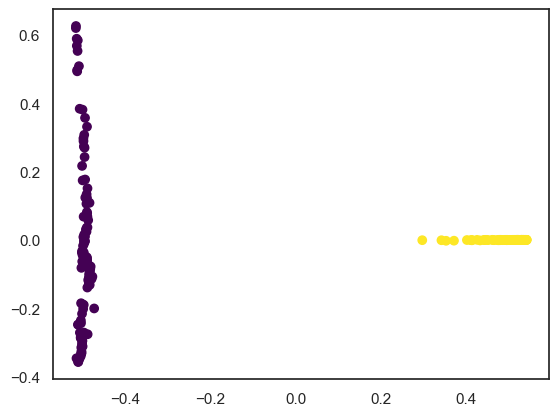

In [33]:
plt.scatter(score_Kernel_pca[:,0],score_Kernel_pca[:,1],c=y_test,cmap='viridis')

In [39]:
X_hat_kpca= kernel_pca.inverse_transform(kernel_pca.transform(X_test))
pca=PCA(n_components=2)
pca.fit(X_train)
X_hat_pca=pca.inverse_transform(pca.transform(X_test))

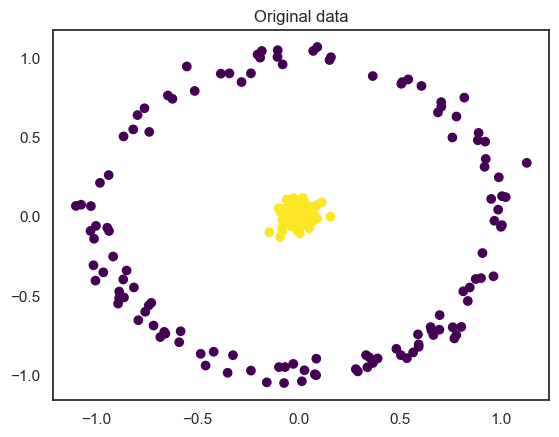

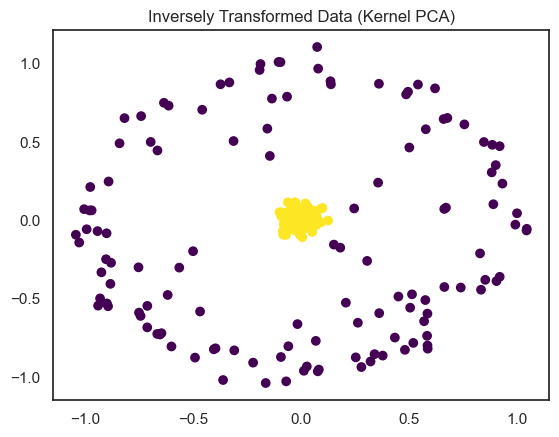

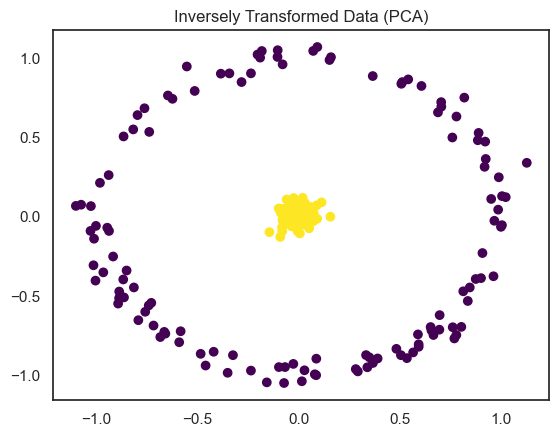

In [40]:
plt.scatter(X_test[:,0],X_test[:,1] ,c=y_test,cmap='viridis')
plt.title("Original data")
plt.show()

plt.scatter(X_hat_kpca[:,0],X_hat_kpca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (Kernel PCA)")
plt.show()

plt.scatter(X_hat_pca[:,0],X_hat_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (PCA)")
plt.show()

# Ejercicio 
 Use kernel pca para ajustar el ruido de los digitos en las imagenes de prueba

In [41]:
X_train_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_train_noisy.csv').to_numpy()
X_test_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_test_noisy.csv').to_numpy()

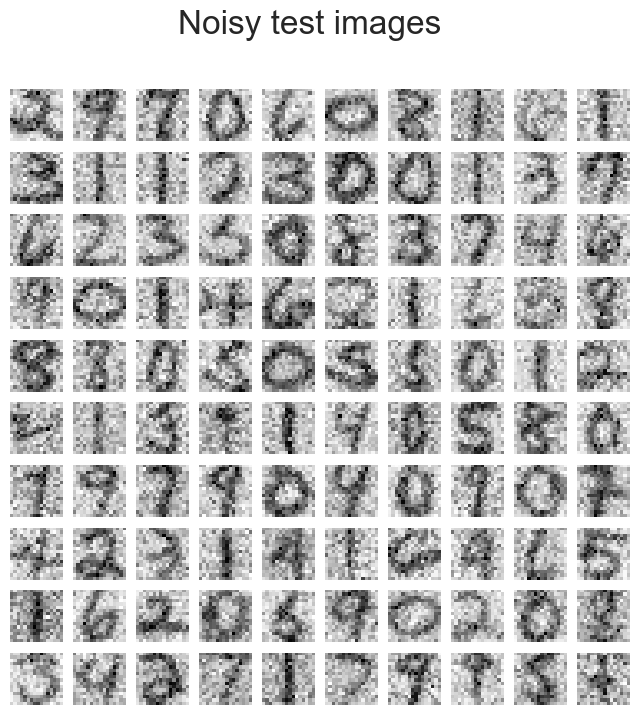

In [42]:
# Helper function for plotting the digit images
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
plot_digits(X_test_noisy, "Noisy test images")

# Paso 1:
se realiza PCA y kernel PCA sobre el set de entrenamiento de las imagenes para la descomposición en sus principales componentes

In [43]:
pca = PCA(n_components=37)
pca.fit(X_train_noisy)

kernel_pca=KernelPCA( kernel="rbf", gamma=0.01, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(X_train_noisy)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=0.01, kernel='rbf')

# paso 2:
a partir de la transformación inversa se pueden reconstruir los digitos con el menor ruido posible. Para garantizar esto se prueba pca y kernel pca 

In [45]:
X_hat_pca= pca.inverse_transform(pca.transform(X_test_noisy))

X_hat_kpca= kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

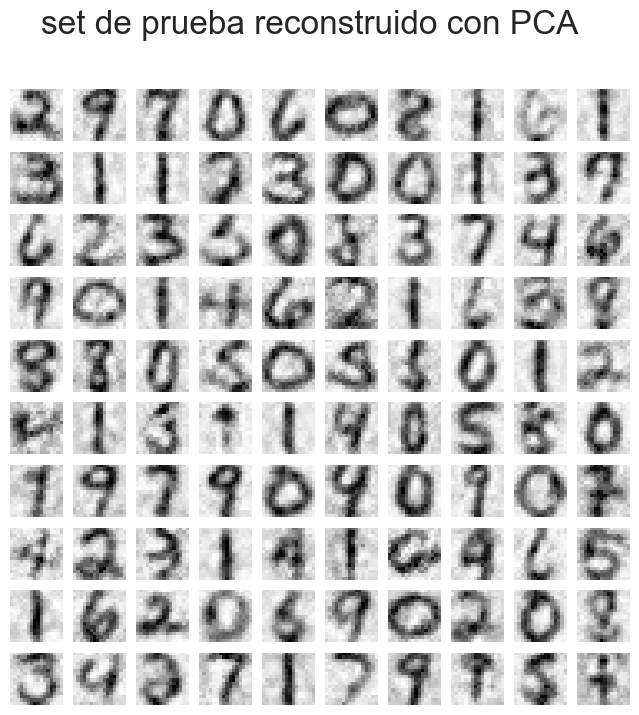

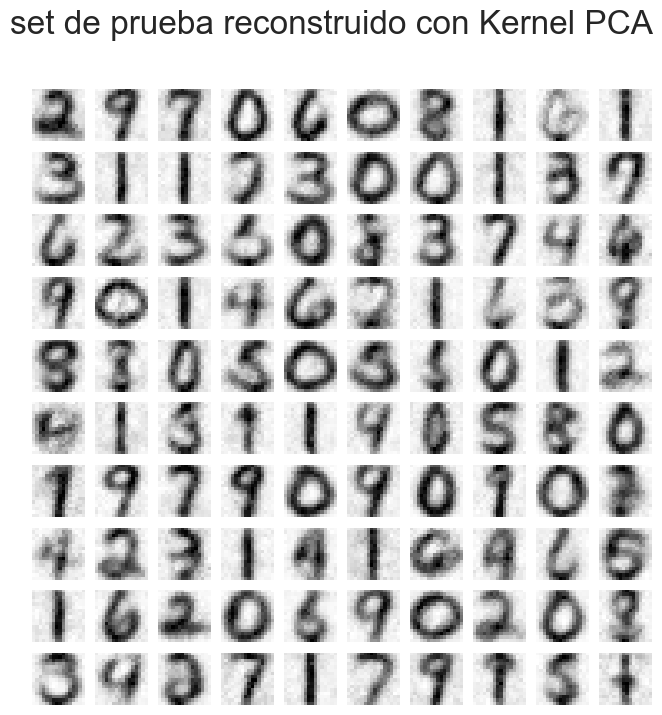

In [46]:
plot_digits(X_hat_pca, "set de prueba reconstruido con PCA")

plot_digits(X_hat_kpca, "set de prueba reconstruido con Kernel PCA")